In [1552]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Predict if a client will subscribe (yes/no) to a term deposit

https://www.kaggle.com/datasets/aslanahmedov/predict-term-deposit

In [1554]:
df = pd.read_csv("/media/anthony/nvme1/RebelWayMachineLearning/Coursework/PredictTermDeposit.csv")

In [1555]:
df.head(10)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,1007,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,1008,NaN,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,1009,58.0,retired,married,primary,no,NaN,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,1010,43.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [1556]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [1557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [1558]:
df.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [1559]:
df['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

In [1560]:
df.drop(['Id','contact','month','pdays','poutcome','previous','campaign','day','duration'], axis=1, inplace=True)
#df.drop(['Id','contact','month','pdays','previous','campaign','day','duration'], axis=1, inplace=True)

In [1561]:
df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,no
1,44.0,technician,single,secondary,no,29.0,yes,no,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,no
4,33.0,unknown,single,unknown,no,1.0,no,no,no


<Axes: xlabel='age', ylabel='marital'>

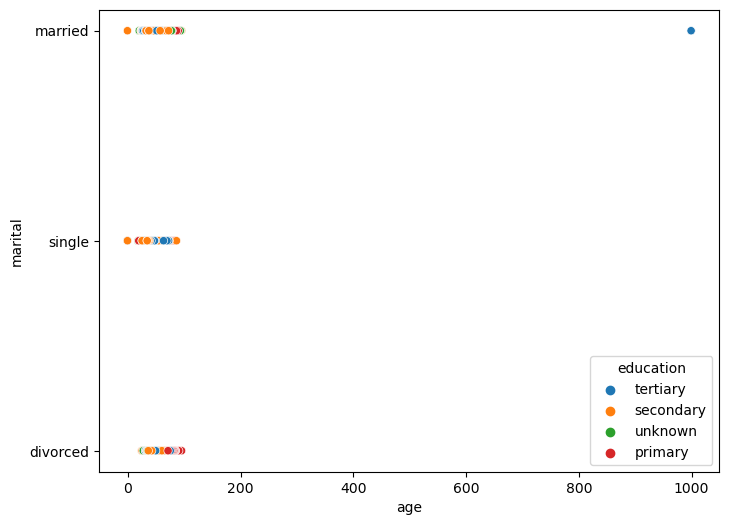

In [1562]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='marital', hue='education', data=df)

In [1563]:
print(df['age'].isna().sum())

9


In [1564]:
df.drop(df[df['age'] > 100].index, inplace=True)
df.drop(df[df['age'] < 20].index, inplace=True)
df = df.dropna(subset=['age'])

<Axes: xlabel='age', ylabel='marital'>

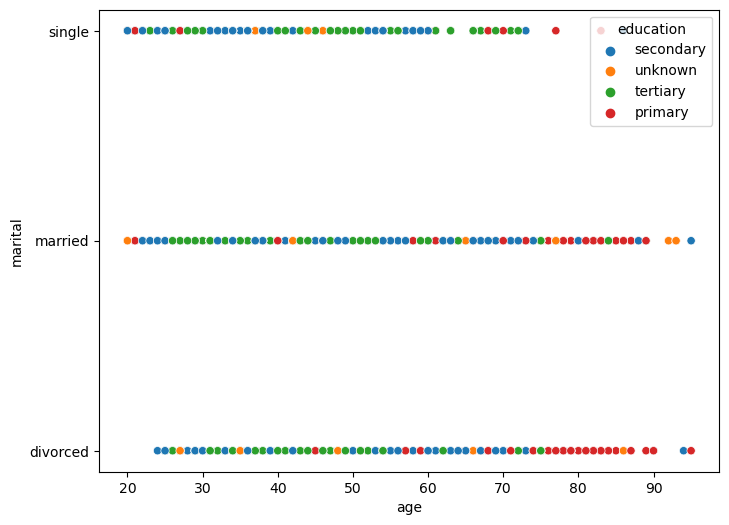

In [1565]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='marital', hue='education', data=df)

<Axes: xlabel='age', ylabel='marital'>

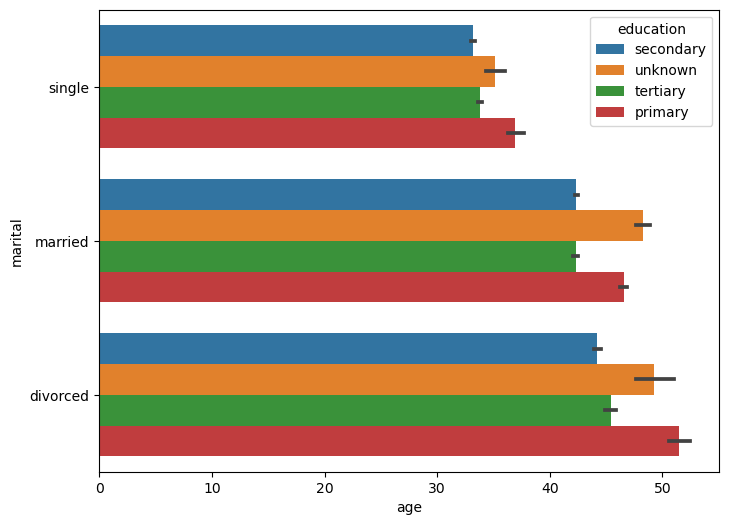

In [1566]:
plt.figure(figsize=(8,6))
sns.barplot(x='age', y='marital', hue='education', data=df)

In [1567]:
print(df['balance'].isna().sum())

2


In [1568]:
df.drop(df[df['balance'] < 5000].index, inplace=True)
df = df.dropna(subset=['balance'])

In [1569]:
df['balance'].values

array([10635.,  6530., 12223., ...,  5083.,  6879.,  5715.])

<Axes: xlabel='balance', ylabel='marital'>

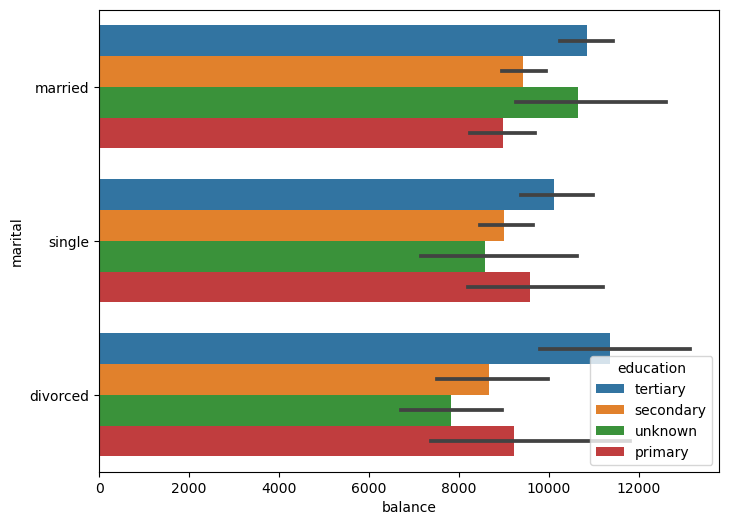

In [1570]:
plt.figure(figsize=(8,6))
sns.barplot(x='balance', y='marital', hue='education', data=df)

In [1571]:
df.head()

,age,job,marital,education,default,balance,housing,loan,y
34,51.0,management,married,tertiary,no,10635.0,yes,no,no
65,51.0,management,married,tertiary,no,6530.0,yes,no,no
69,35.0,blue-collar,single,secondary,no,12223.0,yes,yes,no
70,57.0,blue-collar,married,secondary,no,5935.0,yes,yes,no
205,50.0,services,married,secondary,no,5699.0,yes,no,no


Replace and map all object values so numerical

<Axes: xlabel='balance', ylabel='job'>

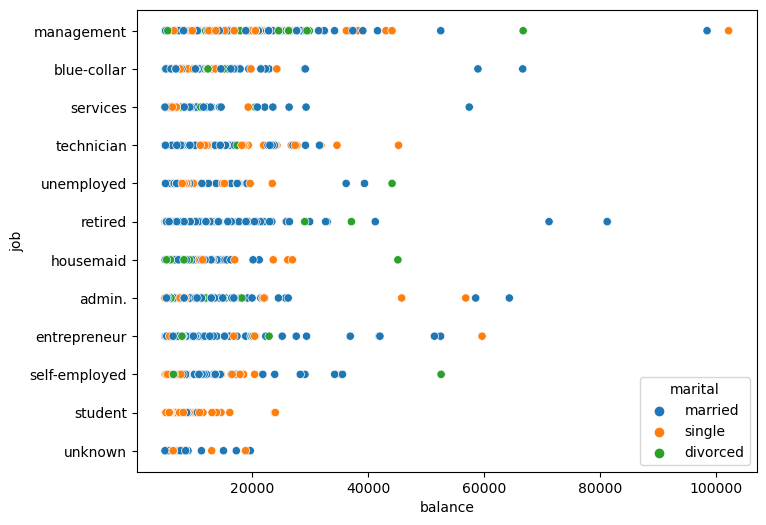

In [1573]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='balance', y='job', hue='marital', data=df)

In [1574]:
column_objects = df.drop('y',axis=1).select_dtypes(include=['object']).columns
for column_name in column_objects:
    vals = df[column_name].values
    vals = list(set(vals))
    vals_map = {}
    vals_map = dict((j, i) for i, j in enumerate(vals))
    print(vals_map)
    df[column_name] = df[column_name].replace(vals_map)


{'self-employed': 0, 'services': 1, 'housemaid': 2, 'admin.': 3, 'management': 4, 'technician': 5, 'unemployed': 6, 'retired': 7, 'unknown': 8, 'student': 9, 'entrepreneur': 10, 'blue-collar': 11}
{'married': 0, 'divorced': 1, 'single': 2}
{'unknown': 0, 'secondary': 1, 'primary': 2, 'tertiary': 3}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}


/tmp/ipykernel_22530/2207259395.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column_name] = df[column_name].replace(vals_map)


In [1575]:
df.head()

,age,job,marital,education,default,balance,housing,loan,y
34,51.0,4,0,3,0,10635.0,1,0,no
65,51.0,4,0,3,0,6530.0,1,0,no
69,35.0,11,2,1,0,12223.0,1,1,no
70,57.0,11,0,1,0,5935.0,1,1,no
205,50.0,1,0,1,0,5699.0,1,0,no


Standardize Data

In [1577]:
data = df.drop(['y'],axis=1).values
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)

In [1578]:
df.head()

,age,job,marital,education,default,balance,housing,loan,y
34,51.0,4,0,3,0,10635.0,1,0,no
65,51.0,4,0,3,0,6530.0,1,0,no
69,35.0,11,2,1,0,12223.0,1,1,no
70,57.0,11,0,1,0,5935.0,1,1,no
205,50.0,1,0,1,0,5699.0,1,0,no


In [1579]:
standard_data = (data - mean) / std_dev
standard_df = pd.DataFrame(standard_data, columns=df.drop(['y'],axis=1).columns)

In [1580]:
standard_df.head()

,age,job,marital,education,default,balance,housing,loan
0,0.638837,-0.444261,-0.722668,1.089945,-0.032484,0.111639,1.072927,-0.288730
1,0.638837,-0.444261,-0.722668,1.089945,-0.032484,-0.453639,1.072927,-0.288730
2,-0.758180,1.751908,1.548688,-0.913273,-0.032484,0.330315,1.072927,3.463442
3,1.162718,1.751908,-0.722668,-0.913273,-0.032484,-0.535573,1.072927,3.463442
4,0.551523,-1.385476,-0.722668,-0.913273,-0.032484,-0.568072,1.072927,-0.288730


In [1581]:
from sklearn.preprocessing import StandardScaler

In [1582]:
df.head()

,age,job,marital,education,default,balance,housing,loan,y
34,51.0,4,0,3,0,10635.0,1,0,no
65,51.0,4,0,3,0,6530.0,1,0,no
69,35.0,11,2,1,0,12223.0,1,1,no
70,57.0,11,0,1,0,5935.0,1,1,no
205,50.0,1,0,1,0,5699.0,1,0,no


In [1583]:
scaler = StandardScaler()

In [1584]:
scaler.fit(df.drop('y',axis=1))

StandardScaler()

In [1585]:
sk_features_scaled = scaler.transform(df.drop('y',axis=1))

In [1586]:
sk_features_scaled

array([[ 0.63883693, -0.4442606 , -0.72266808, ...,  0.11163944,
         1.07292664, -0.28873007],
       [ 0.63883693, -0.4442606 , -0.72266808, ..., -0.45363896,
         1.07292664, -0.28873007],
       [-0.75817976,  1.75190804,  1.54868846, ...,  0.33031474,
         1.07292664,  3.46344248],
       ...,
       [-0.93280685, -0.13052222, -0.72266808, ..., -0.65289788,
        -0.93203017, -0.28873007],
       [ 0.20226922,  1.75190804, -0.72266808, ..., -0.40557997,
        -0.93203017, -0.28873007],
       [ 2.47242135,  0.49695453, -0.72266808, ..., -0.56586842,
        -0.93203017, -0.28873007]])

In [1587]:
df_features_scaled = pd.DataFrame(sk_features_scaled, columns=df.columns[:-1])

In [1588]:
df_features_scaled

,age,job,marital,education,default,balance,housing,loan
0,0.638837,-0.444261,-0.722668,1.089945,-0.032484,0.111639,1.072927,-0.288730
1,0.638837,-0.444261,-0.722668,1.089945,-0.032484,-0.453639,1.072927,-0.288730
2,-0.758180,1.751908,1.548688,-0.913273,-0.032484,0.330315,1.072927,3.463442
3,1.162718,1.751908,-0.722668,-0.913273,-0.032484,-0.535573,1.072927,3.463442
4,0.551523,-1.385476,-0.722668,-0.913273,-0.032484,-0.568072,1.072927,-0.288730
...,...,...,...,...,...,...,...,...
2841,2.996303,0.496955,-0.722668,0.088336,-0.032484,0.603108,-0.932030,-0.288730
2842,2.035854,1.751908,-0.722668,-0.913273,-0.032484,0.899036,-0.932030,-0.288730
2843,-0.932807,-0.130522,-0.722668,-0.913273,-0.032484,-0.652898,-0.932030,-0.288730
2844,0.202269,1.751908,-0.722668,-0.913273,-0.032484,-0.405580,-0.932030,-0.288730


Transform target "y"

In [1590]:
df['y'] = df['y'].replace({'no':0, 'yes':1})

/tmp/ipykernel_22530/1777000204.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'] = df['y'].replace({'no':0, 'yes':1})


In [1591]:
df['y'].value_counts()

y
0    2405
1     441
Name: count, dtype: int64

SCIKIT LEARN

In [1593]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [1594]:
K = 1
knn = KNeighborsClassifier(K)

In [1595]:
X = df_features_scaled
y = df['y']

In [1596]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=22)

In [1597]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [1598]:
pred = knn.predict(X_test)

In [1599]:
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

SCORE IT

In [1601]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[649  78]
 [ 75  52]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       727
           1       0.40      0.41      0.40       127

    accuracy                           0.82       854
   macro avg       0.65      0.65      0.65       854
weighted avg       0.82      0.82      0.82       854



A bit slow to run ranges

In [1647]:
error_rate = []
val_range = (10,60)
for i in range(val_range[0],val_range[1]):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred_y = knn.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

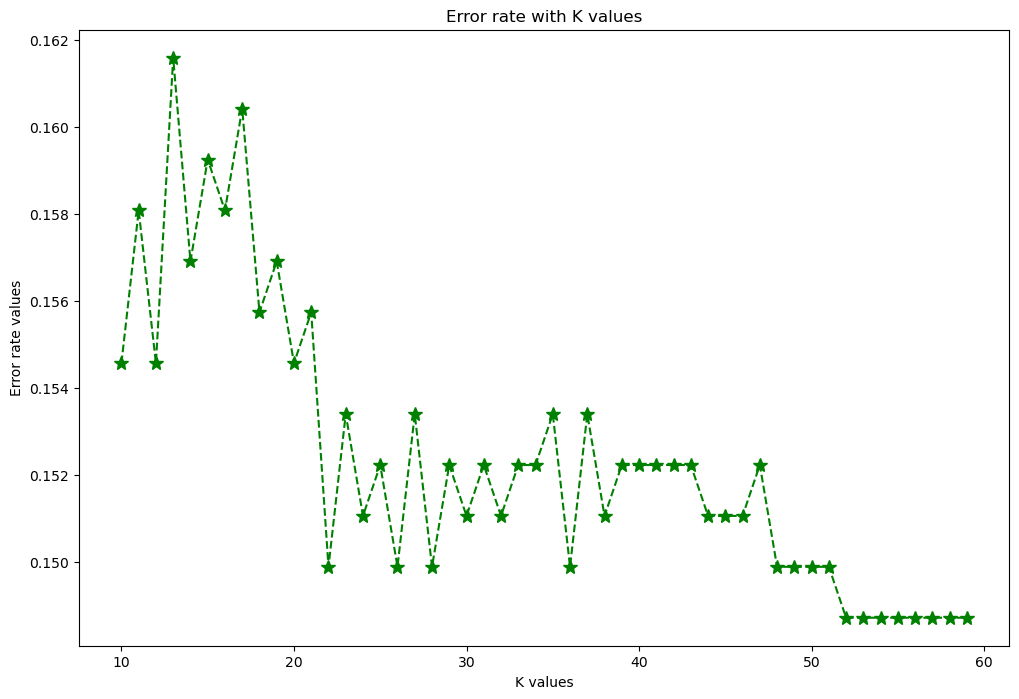

In [1649]:
plt.figure(figsize=(12,8))
plt.plot(range(val_range[0],val_range[1]),error_rate, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [1655]:
K = 55
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print("---------------")
print(classification_report(y_test, pred))

[[727   0]
 [127   0]]
---------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       727
           1       0.00      0.00      0.00       127

    accuracy                           0.85       854
   macro avg       0.43      0.50      0.46       854
weighted avg       0.72      0.85      0.78       854



/home/anthony/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anthony/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anthony/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [1540]:
error_rate = []
val_range = (50,55)
for i in range(val_range[0],val_range[1]):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred_y = knn.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

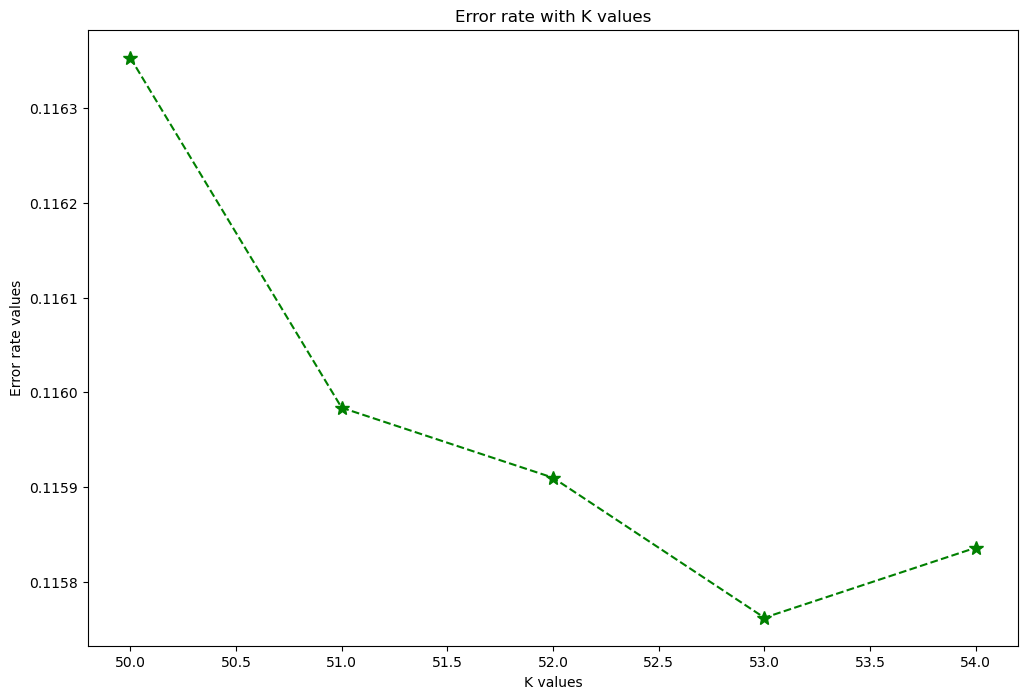

In [1542]:
plt.figure(figsize=(12,8))
plt.plot(range(val_range[0],val_range[1]),error_rate, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [1544]:
K = 53
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print("---------------")
print(classification_report(y_test, pred))

[[11967     9]
 [ 1559    10]]
---------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11976
           1       0.53      0.01      0.01      1569

    accuracy                           0.88     13545
   macro avg       0.71      0.50      0.48     13545
weighted avg       0.84      0.88      0.83     13545

